# Inestabilidad Magnetorotacional


In [4]:
#Importamos bibliotecas
import numpy as np
import plasmapy as pp
import matplotlib.pyplot as plt



In [ ]:
#Trabajaremos la inestabilidad magnetorotacional en un disco de acreción
#Importamos las constantes
from astropy.constants import G, c, m_p, M_sun, k_B, hbar, e, eps0, mu0
from astropy import units as u

#Definimos la relación de dispersión para la inestabilidad magnetorotacional
def dispersion_relation(k, Omega, B, rho0, cs0):
    """
    Returns the dispersion relation for the magnetorotational instability.
    Parameters
    ----------
    k : `~astropy.units.Quantity`
        The wavenumber of the perturbation.
    Omega : `~astropy.units.Quantity`
        The background angular velocity.
    B : `~astropy.units.Quantity`
        The background magnetic field.
    rho0 : `~astropy.units.Quantity`
        The background mass density.
    cs0 : `~astropy.units.Quantity`
        The background sound speed.
    Returns
    -------
    omega : `~astropy.units.Quantity`
        The frequency of the perturbation.
    """

    
    #Calculamos la velocidad de Alfven
    vA = B / np.sqrt(mu0 * rho0)
    #Calculamos la velocidad del sonido
    cs = np.sqrt(cs0 ** 2 + vA ** 2)

    #Calculamos el término de coriolis
    coriolis = 2 * Omega
    #Calculamos el término de la tensión magnética
    magnetic_tension = B * B / (mu0 * rho0)
    #Calculamos el término de la presión
    pressure = cs0 ** 2 * k ** 2 / rho0
    #Calculamos la relación de dispersión
    omega = np.sqrt(coriolis ** 2 - pressure - magnetic_tension)

    return omega

#Definimos los parámetros del disco de acreción
Omega = 1e-6
B = 1e-4 
rho0 = 1e-9
cs0 = 1e3 

#Definimos el rango de valores de k
k = np.linspace(1e-6, 1e-4, 100)

#Calculamos la relación de dispersión
omega = dispersion_relation(k, Omega, B, rho0, cs0)

#Graficamos la relación de dispersión
plt.figure()
plt.plot(k, omega)
plt.xlabel(r'$k$')
plt.ylabel(r'$\omega$')
plt.title('Magnetorotational Instability')
plt.show()

UnitConversionError: Can only apply 'add' function to dimensionless quantities when other argument is not a quantity (unless the latter is all zero/infinity/nan).

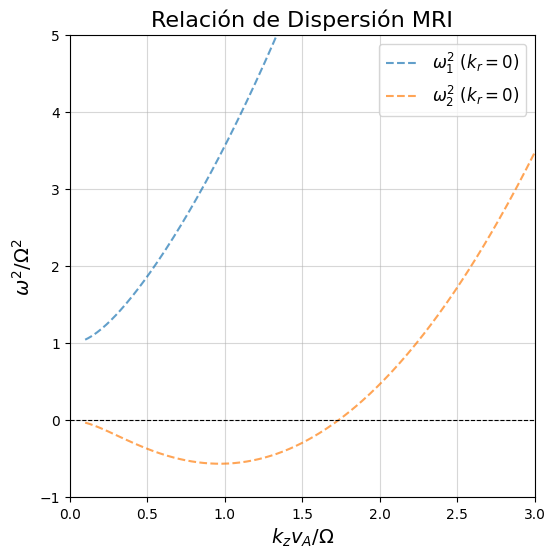

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de parámetros
Omega = 1  # Velocidad angular normalizada
v_A = 1  # Velocidad de Alfvén normalizada
kz_values = np.linspace(0.1, 5, 500)  # Valores de k_z*v_A/Omega para el eje x
r = 1  # Radio normalizado

# Gradiente de Omega respecto a r (dOmega/dr)
d_Omega_dr = -1.5* Omega/r  # Puede ajustarse según el problema físico

# Frecuencias de Brunt-Väisälä (normalizadas)
Nz = 0.8  # Frecuencia axial normalizada
Nr = 0.008  # Frecuencia radial normalizada

# Función para resolver la relación de dispersión
def dispersion_relation(kz, kr):
    # Cálculo de términos de la ecuación cuadrática en w^2
    A = (kz**2+kr**2)/kz**2  # Coeficiente de \tilde{w}^4
    B = -(4*Omega**2 + 2 * Omega * d_Omega_dr + (kr / kz * Nz - Nr)**2)  # Coeficiente de \tilde{w}^2
    #B = -(5*Omega**2 + (kr / kz * Nz - Nr)**2)  # Coeficiente de \tilde{w}^2
    C = -4 * Omega**2 * kz**2 * v_A**2  # Término independiente

    # Resolver la ecuación cuadrática
    w_squared_tilde = np.roots([A, B, C])
    return w_squared_tilde

# Calcular w^2/Omega^2 para distintos valores de k_r y k_z
kr = 2.0  # Ejemplo de k_r
w_squared_normalized = []
for kz in kz_values:
    w_squared_tilde = dispersion_relation(kz, kr)
    w_squared = w_squared_tilde + kz**2 * v_A**2  # Reconstruir w^2 a partir de \tilde{w}^2
    w_squared_normalized.append(w_squared / Omega**2)

# Calcular el caso límite k_r = 0
kr_limit = 0.0
w_squared_limit = []
for kz in kz_values:
    w_squared_tilde = dispersion_relation(kz, kr_limit)
    w_squared = w_squared_tilde + kz**2 * v_A**2  # Reconstruir w^2
    w_squared_limit.append(w_squared / Omega**2)

# Convertir resultados a arrays para graficar
w_squared_normalized = np.array(w_squared_normalized)
w_squared_limit = np.array(w_squared_limit)

# Gráficas
plt.figure(figsize=(6, 6))

# Gráfica para valores arbitrarios de k_r
# plt.plot(kz_values * v_A / Omega, w_squared_normalized[:, 0], label=r"$\omega_1^2$ (Branch 1)")
# plt.plot(kz_values * v_A / Omega, w_squared_normalized[:, 1], label=r"$\omega_2^2$ (Branch 2)")


# Gráfica del caso límite k_r = 0
plt.plot(kz_values * v_A / Omega, w_squared_limit[:, 0], '--', label=r"$\omega_1^2$ ($k_r=0$)", alpha=0.7)
plt.plot(kz_values * v_A / Omega, w_squared_limit[:, 1], '--', label=r"$\omega_2^2$ ($k_r=0$)", alpha=0.7)


# Personalización de la gráfica
plt.xlabel(r"$k_z v_A / \Omega$", fontsize=14)
plt.ylabel(r"$\omega^2 / \Omega^2$", fontsize=14)
plt.ylim(-1, 5)
plt.xlim(0, 3)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.title("Relación de Dispersión MRI", fontsize=16)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.show()

<!-- # Inestabilidad Magnetorotacional -->